<a href="https://colab.research.google.com/github/Kvgohokar/IPL-Batsman-Analysis/blob/main/Virat_and_Warner_comparison_in_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Virat Kohli is an Indian international cricketer. He has represented Royal Challengers Bangalore (RCB) for all the seasons as a right-handed batsman. 

David Warner is an Australian international cricketer. He has played for various franchise over the seasons. Most recently he represented Sunrisers Hyderabad as a left handed opening batsman.



In this colab notebook, we analyse performance of Virat Kohli (Batsman) and David Warner (Batsman) in Indian Premier League (IPL) and do a comparison in terms of:

1. Runs scored, Average, Strike rate per season.
2. Boundaries hit (fours and sixes).
3. Number of ducks, 30+, 50+, 100+ scores each season.

David Warner did not play in ipl in the seasons 2008 and 2018, so we will exclude that data.

### **Preprocessing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sports Analytics/deliveries.csv')

mdf = pd.read_csv('/content/drive/MyDrive/Sports Analytics/matches.csv')

In [ ]:
matches_2008 = mdf[mdf.season == 2008].id.unique().tolist()
matches_2018 = mdf[mdf.season == 2018].id.unique().tolist()

In [ ]:
matches_del = matches_2008 + matches_2018

In [ ]:
mdf_n = mdf[mdf.season != 2008]

In [ ]:
mdf_f = mdf_n[mdf_n.season != 2018]

In [ ]:
df.batsman.unique()

In [ ]:
df_DW = df[df.batsman == 'DA Warner']
df_VK = df[df.batsman == 'V Kohli']

In [ ]:
df_DW.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
m_ls_DW = list(df_DW.match_id.unique())
m_ls_VK = list(df_VK.match_id.unique())

In [ ]:
for i in matches_del:
    if i in m_ls_VK:
        m_ls_VK.remove(i)

In [ ]:
mdf_DW = mdf[mdf.id.isin(m_ls_DW)]
mdf_VK = mdf[mdf.id.isin(m_ls_VK)]

In [ ]:
mdf_VK.season.unique()

array([2017, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2019])

In [ ]:
mdf.dtypes

In [ ]:
mdf_DW['date'] = pd.to_datetime(mdf_DW['date'])
mdf_VK['date'] = pd.to_datetime(mdf_VK['date'])

In [ ]:
mdf_DW = mdf_DW.sort_values(['date'])
mdf_VK = mdf_VK.sort_values(['date'])

In [ ]:
mdf_DW.reset_index(inplace = True, drop = True)
df_DW.reset_index(inplace = True, drop = True)

mdf_VK.reset_index(inplace = True, drop = True)
df_VK.reset_index(inplace = True, drop = True)

### **Runs, Average, Strike rate per season**


In [ ]:
seasons = list(mdf_VK.season.unique())
seasons

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019]

In [ ]:
#We calculate the total runs scored and total balls faced per match.
runs_ls_VK = []
balls_ls_VK = []

for m in m_ls_VK:
    temp_df = df_VK[df_VK.match_id == m]
    temp_df_no_wides = temp_df[temp_df['wide_runs']== 0] #Wide balls are not counted in balls faced.
    total_balls = len(temp_df_no_wides)
    balls_ls_VK.append(total_balls)

    runs_scored = sum(temp_df.batsman_runs)
    runs_ls_VK.append(runs_scored)

runs_ls_DW = []
balls_ls_DW = []

for m in m_ls_DW:
    temp_df = df_DW[df_DW.match_id == m]
    temp_df_no_wides = temp_df[temp_df['wide_runs']== 0] #Wide balls are not counted in balls faced.
    total_balls = len(temp_df_no_wides)
    balls_ls_DW.append(total_balls)

    runs_scored = sum(temp_df.batsman_runs)
    runs_ls_DW.append(runs_scored)

In [ ]:
mdf_VK['runs'] = runs_ls_VK
mdf_VK['balls'] = balls_ls_VK
mdf_VK.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,runs,balls
0,119,2009,Cape Town,2009-04-18,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,75,0,R Dravid,Newlands,BR Doctrove,RB Tiffin,NaN,62,47


In [ ]:
mdf_DW['runs'] = runs_ls_DW
mdf_DW['balls'] = balls_ls_DW
mdf_DW.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,runs,balls
0,141,2009,Johannesburg,2009-05-02,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,18,0,SB Jakati,New Wanderers Stadium,DJ Harper,RE Koertzen,NaN,14,8


In [ ]:
#Now we calculate runs, balls, number of matches per season.
runs_season_VK = []
m_season_VK = []
balls_season_VK = []

runs_season_DW = []
m_season_DW = []
balls_season_DW = []


for i in seasons:
  m_season_VK.append(len(list(mdf_VK[mdf_VK.season == i].id.unique())))
  runs_season_VK.append(mdf_VK[mdf_VK.season == i].runs.sum())
  balls_season_VK.append(mdf_VK[mdf_VK.season == i].balls.sum())

  m_season_DW.append(len(list(mdf_DW[mdf_DW.season == i].id.unique())))
  runs_season_DW.append(mdf_DW[mdf_DW.season == i].runs.sum())
  balls_season_DW.append(mdf_DW[mdf_DW.season == i].balls.sum())

In [ ]:
VK_season = pd.DataFrame()
VK_season['season'] = seasons
VK_season['matches'] = m_season_VK
VK_season['runs'] = runs_season_VK
VK_season['balls'] = balls_season_VK
VK_season['average'] = round(VK_season['runs']/VK_season['matches'],2)
VK_season['strike_rate'] = round(VK_season['runs']/ VK_season['balls']*100,2)

VK_season

,season,matches,runs,balls,average,strike_rate
0,2009,13,372,305,28.62,121.97
1,2010,13,217,195,16.69,111.28
2,2011,16,499,360,31.19,138.61
3,2012,15,439,388,29.27,113.14
4,2013,16,489,409,30.56,119.56
5,2014,14,506,359,36.14,140.95
6,2015,16,478,387,29.88,123.51
7,2016,16,666,477,41.62,139.62
8,2017,10,592,368,59.20,160.87
9,2019,14,472,328,33.71,143.90


In [ ]:
DW_season = pd.DataFrame()
DW_season['season'] = seasons
DW_season['matches'] = m_season_DW
DW_season['runs'] = runs_season_DW
DW_season['balls'] = balls_season_DW
DW_season['average'] = round(DW_season['runs']/DW_season['matches'],2)
DW_season['strike_rate'] = round(DW_season['runs']/ DW_season['balls']*100,2)

DW_season

,season,matches,runs,balls,average,strike_rate
0,2009,7,282,218,40.29,129.36
1,2010,11,503,350,45.73,143.71
2,2011,13,296,203,22.77,145.81
3,2012,8,243,192,30.38,126.56
4,2013,16,440,319,27.50,137.93
5,2014,14,312,249,22.29,125.30
6,2015,14,528,375,37.71,140.80
7,2016,17,723,455,42.53,158.90
8,2017,14,687,464,49.07,148.06
9,2019,12,727,481,60.58,151.14


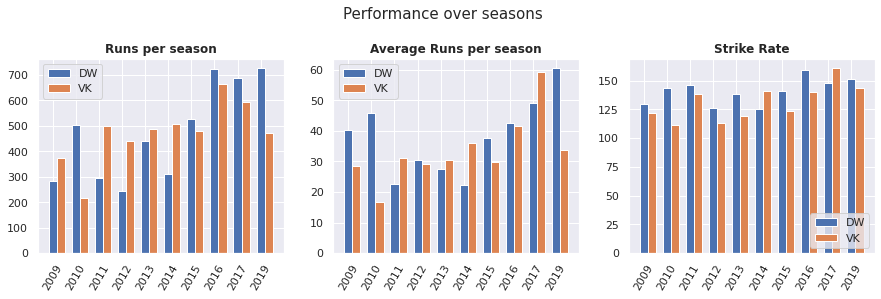

In [ ]:
#Plot: Runs per season

fig, axs = plt.subplots(1,3, figsize=(15,4))
X = np.arange(10)

DW = axs[0].bar(X  , DW_season.runs.tolist(), width =  0.35, label = 'DW' )
VK = axs[0].bar(X + 0.35, VK_season.runs.tolist(), width = 0.35, label='VK')
axs[0].set_title('Runs per season', fontweight='bold')
axs[0].legend(loc='upper left')

DW1 = axs[1].bar(X  , DW_season.average.tolist(), width =  0.35, label = 'DW' )
VK1 = axs[1].bar(X + 0.35, VK_season.average.tolist(), width = 0.35, label='VK')
axs[1].set_title('Average Runs per season', fontweight='bold')
axs[1].legend(loc='upper left')

DW2 = axs[2].bar(X  , DW_season.strike_rate.tolist(), width =  0.35, label = 'DW' )
VK2 = axs[2].bar(X + 0.35, VK_season.strike_rate.tolist(), width = 0.35, label='VK')
axs[2].set_title("Strike Rate", fontweight='bold')
axs[2].legend(loc='lower right')

for i in range(0,3):
  axs[i].set_xticks(X)
  axs[i].set_xticklabels(seasons, rotation = 60)

plt.suptitle('Performance over seasons', size = 15, fontname="DejaVu Sans")
plt.subplots_adjust(top=0.8)
plt.show()

#X axis labels, X and Y axis names

David Warner and Virat Kolhi both have had great success has batsman in IPL. Virat Kolhi has scored 400+ runs every season after 2010. David Warner on the other hand, has managed to score 500+ runs in the seasons except 2009, 2011, 2012, 2014. In comparison, Kolhi has had the upper hand during the beginning few years (till 2014). Warner has had great success after 2014, and has got the better of Kolhi in terms of runs scored.

Average runs scored has varied over the seasons. During 2009,2010 and 2019 Warner has had better numbers. Whereas in 2011, 2014 and 2017, Kolhi has dominated. In terms of strike rate, Warner has had the upper hand most years.

### **Number of Ducks, 30+, 50+, 100s per season**


In [ ]:
mdf_VK.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,runs,balls
0,119,2009,Cape Town,2009-04-18,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,75,0,R Dravid,Newlands,BR Doctrove,RB Tiffin,NaN,62,47


In [ ]:
#Ducks
match_ducks_VK = mdf_VK[mdf_VK['runs'] == 0].season.unique().tolist()
match_ducks_DW = mdf_DW[mdf_DW['runs'] == 0].season.unique().tolist()

Ducks_VK = []

for i in seasons:
  if i in match_ducks_VK:
    Ducks_VK.append(1)
  else:
    Ducks_VK.append(0)

Ducks_DW = []

for i in seasons:
  if i in match_ducks_DW:
    Ducks_DW.append(1)
  else:
    Ducks_DW.append(0)
Ducks_DW

[0, 0, 1, 0, 0, 1, 1, 0, 1, 0]

In [ ]:
# 30+ scores 
match_30_VK = mdf_VK[mdf_VK['runs'] >= 30].id.unique().tolist() #match id for 30 plus score
match_30_DW = mdf_DW[mdf_DW['runs'] >= 30].id.unique().tolist()

mdf_VK_30 = mdf_VK[mdf_VK.id.isin(match_30_VK)]
mdf_DW_30 = mdf_DW[mdf_DW.id.isin(match_30_DW)]

VK_30 = [ ]
DW_30 = [ ]

for i in seasons:
  VK_30.append(len(mdf_VK_30[mdf_VK_30['season'] == i]))
  DW_30.append(len(mdf_DW_30[mdf_DW_30['season'] == i]))

In [ ]:
# 50+ scores 
match_50_VK = mdf_VK[mdf_VK['runs'] >= 50].id.unique().tolist() #match id for 30 plus score
match_50_DW = mdf_DW[mdf_DW['runs'] >= 50].id.unique().tolist()

mdf_VK_50 = mdf_VK[mdf_VK.id.isin(match_50_VK)]
mdf_DW_50 = mdf_DW[mdf_DW.id.isin(match_50_DW)]

VK_50 = [ ]
DW_50 = [ ]

for i in seasons:
  VK_50.append(len(mdf_VK_50[mdf_VK_50['season'] == i]))
  DW_50.append(len(mdf_DW_50[mdf_DW_50['season'] == i]))

In [ ]:
# 100+ scores 
match_100_VK = mdf_VK[mdf_VK['runs'] >= 100].id.unique().tolist() #match id for 30 plus score
match_100_DW = mdf_DW[mdf_DW['runs'] >= 100].id.unique().tolist()

mdf_VK_100 = mdf_VK[mdf_VK.id.isin(match_100_VK)]
mdf_DW_100 = mdf_DW[mdf_DW.id.isin(match_100_DW)]

VK_100 = [ ]
DW_100 = [ ]

for i in seasons:
  VK_100.append(len(mdf_VK_100[mdf_VK_100['season'] == i]))
  DW_100.append(len(mdf_DW_100[mdf_DW_100['season'] == i]))

In [ ]:
df_Scores = pd.DataFrame()
df_Scores['season'] = seasons

df_Scores['ducks_VK'] = Ducks_VK
df_Scores['ducks_DW'] = Ducks_DW

df_Scores['thirty_plus_VK'] = VK_30
df_Scores['thirty_plus_DW'] = DW_30

df_Scores['fifties_VK'] = VK_50
df_Scores['fifties_DW'] = DW_50

df_Scores['hundreds_VK'] = VK_100
df_Scores['hundreds_DW'] = DW_100

df_Scores
# 4 centuries in 2016, none in 2017 VK

,season,ducks_VK,ducks_DW,thirty_plus_VK,thirty_plus_DW,fifties_VK,fifties_DW,hundreds_VK,hundreds_DW
0,2009,1,0,5,4,5,2,0,0
1,2010,0,0,1,9,0,4,0,1
2,2011,0,1,9,5,3,2,0,1
3,2012,0,0,6,4,3,3,0,0
4,2013,0,0,8,3,4,3,0,1
5,2014,1,1,7,5,4,3,0,0
6,2015,1,1,8,9,4,6,0,0
7,2016,0,0,10,9,5,9,1,0
8,2017,1,1,7,9,7,7,3,0
9,2019,0,0,5,10,3,9,1,1


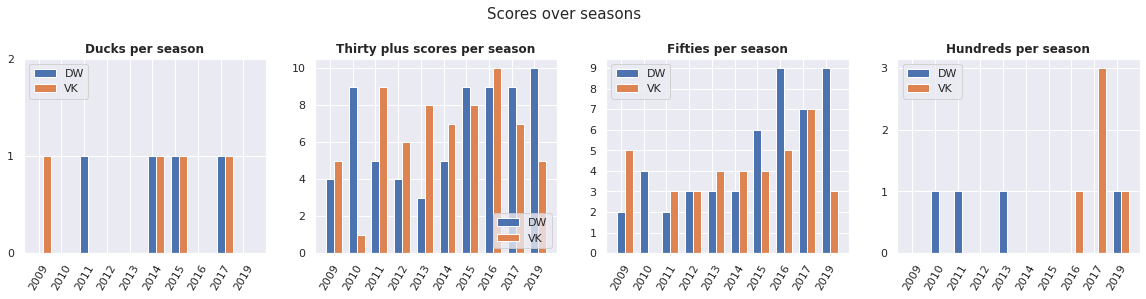

In [ ]:
#Plot: 4plots
fig, axs = plt.subplots(1,4, figsize=(20,4))
X = np.arange(10)

DW = axs[0].bar(X  , df_Scores.ducks_DW.tolist(), width =  0.35, label = 'DW' )
VK = axs[0].bar(X + 0.35, df_Scores.ducks_VK.tolist(), width = 0.35, label='VK')
axs[0].set_title('Ducks per season', fontweight='bold')
axs[0].legend(loc='upper left')
axs[0].set_yticks(np.arange(3))

DW1 = axs[1].bar(X  , df_Scores.thirty_plus_DW.tolist(), width =  0.35, label = 'DW' )
VK1 = axs[1].bar(X + 0.35, df_Scores.thirty_plus_VK.tolist(), width = 0.35, label='VK')
axs[1].set_title('Thirty plus scores per season', fontweight='bold')
axs[1].legend(loc='lower right')

DW2 = axs[2].bar(X  , df_Scores.fifties_DW.tolist(), width =  0.35, label = 'DW' )
VK2 = axs[2].bar(X + 0.35, df_Scores.fifties_VK.tolist(), width = 0.35, label='VK')
axs[2].set_title("Fifties per season", fontweight='bold')
axs[2].legend(loc='upper left')
axs[2].set_yticks(np.arange(10))

DW2 = axs[3].bar(X  , df_Scores.hundreds_DW.tolist(), width =  0.35, label = 'DW' )
VK2 = axs[3].bar(X + 0.35, df_Scores.hundreds_VK.tolist(), width = 0.35, label='VK')
axs[3].set_title("Hundreds per season", fontweight='bold')
axs[3].legend(loc='upper left')
axs[3].set_yticks(np.arange(4))

for i in range(0,4):
  axs[i].set_xticks(X)
  axs[i].set_xticklabels(seasons, rotation = 60)

plt.suptitle('Scores over seasons', size = 15, fontname="DejaVu Sans")
plt.subplots_adjust(top=0.8)
plt.show()

The number of Ducks per seasons has been almost identical for both players. David Warner had managed to score more centuries during the beginning few year but struggled to score in teh recent years. On the other hand, Virat Kohli has had more success scoring centuries in the recent years.

Kolhi had the upper hand in terms of 30 plus scores during the starting few seasons. Warner has managed to beat Kolhi in the recent years.

Fifties scored by both has been almost alike during the years (2011 to 2014). Warner has scored more fifties than Kolhi in the recent years.

Overall, in the recent years, David Warner got better of Kolhi ever so slightly. 

### **Boundaries**


In [ ]:
#number of 4s per match
df_VK_4 = df_VK[df_VK.batsman_runs == 4]
df_DW_4 = df_DW[df_DW.batsman_runs == 4]

match_VK_4 = df_VK_4.match_id.unique().tolist()
match_DW_4 = df_DW_4.match_id.unique().tolist()

VK_4s = []
DW_4s = []

for m in m_ls_VK:
  if m in match_VK_4:
    VK_4s.append(len(df_VK_4[df_VK_4.match_id == m]))
  else:
    VK_4s.append(0)

for m in m_ls_DW:
  if m in match_DW_4:
    DW_4s.append(len(df_DW_4[df_DW_4.match_id == m]))
  else:
    DW_4s.append(0)
    
mdf_VK['fours'] = VK_4s
mdf_DW['fours'] = DW_4s
mdf_DW.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,runs,balls,fours
0,141,2009,Johannesburg,2009-05-02,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,18,0,SB Jakati,New Wanderers Stadium,DJ Harper,RE Koertzen,NaN,14,8,2


In [ ]:
#number of 4s per season
VK_4s_season = []
DW_4s_season = []

for i in seasons:
  VK_4s_season.append(mdf_VK[mdf_VK.season == i].fours.sum())
  DW_4s_season.append(mdf_DW[mdf_DW.season == i].fours.sum())

DW_4s_season

[29, 49, 27, 26, 50, 28, 39, 78, 75, 58]

In [ ]:
#number of 4s per match
df_VK_6 = df_VK[df_VK.batsman_runs == 6]
df_DW_6 = df_DW[df_DW.batsman_runs == 6]

match_VK_6 = df_VK_6.match_id.unique().tolist()
match_DW_6 = df_DW_6.match_id.unique().tolist()

VK_6s = []
DW_6s = []

for m in m_ls_VK:
  if m in match_VK_6:
    VK_6s.append(len(df_VK_6[df_VK_6.match_id == m]))
  else:
    VK_6s.append(0)

for m in m_ls_DW:
  if m in match_DW_6:
    DW_6s.append(len(df_DW_6[df_DW_6.match_id == m]))
  else:
    DW_6s.append(0)
    
mdf_VK['sixes'] = VK_6s
mdf_DW['sixes'] = DW_6s
mdf_DW.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,runs,balls,fours,sixes
0,141,2009,Johannesburg,2009-05-02,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,18,0,SB Jakati,New Wanderers Stadium,DJ Harper,RE Koertzen,NaN,14,8,2,1


In [ ]:
#number of 6s per season
VK_6s_season = []
DW_6s_season = []

for i in seasons:
  VK_6s_season.append(mdf_VK[mdf_VK.season == i].sixes.sum())
  DW_6s_season.append(mdf_DW[mdf_DW.season == i].sixes.sum())

DW_6s_season

[10, 20, 15, 8, 18, 13, 24, 30, 22, 21]

In [ ]:
df_boundaries = pd.DataFrame()
df_boundaries['season'] = seasons
df_boundaries['fours_VK'] = VK_4s_season
df_boundaries['fours_DW'] = DW_4s_season
df_boundaries['sixes_VK'] = VK_6s_season
df_boundaries['sixes_DW'] = DW_6s_season

df_boundaries

,season,fours_VK,fours_DW,sixes_VK,sixes_DW
0,2009,30,29,12,10
1,2010,16,49,10,20
2,2011,51,27,16,15
3,2012,39,26,11,8
4,2013,46,50,15,18
5,2014,51,28,18,13
6,2015,30,39,22,24
7,2016,55,78,23,30
8,2017,48,75,29,22
9,2019,46,58,13,21


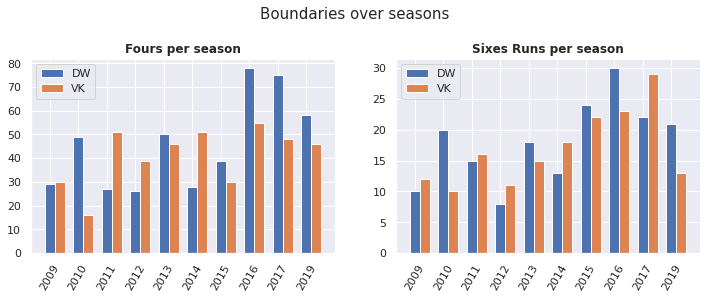

In [ ]:
#Plots:

fig, axs = plt.subplots(1,2, figsize=(12,4))
X = np.arange(10)

DW = axs[0].bar(X  , df_boundaries.fours_DW.tolist(), width =  0.35, label = 'DW' )
VK = axs[0].bar(X + 0.35, df_boundaries.fours_VK.tolist(), width = 0.35, label='VK')
axs[0].set_title('Fours per season', fontweight='bold')
axs[0].legend(loc='upper left')
axs[0].set_yticks(np.arange(0,90,10))

DW1 = axs[1].bar(X  , df_boundaries.sixes_DW.tolist(), width =  0.35, label = 'DW' )
VK1 = axs[1].bar(X + 0.35, df_boundaries.sixes_VK.tolist(), width = 0.35, label='VK')
axs[1].set_title('Sixes Runs per season', fontweight='bold')
axs[1].legend(loc='upper left')

for i in range(0,2):
  axs[i].set_xticks(X)
  axs[i].set_xticklabels(seasons, rotation = 60)

plt.suptitle('Boundaries over seasons', size = 15, fontname="DejaVu Sans")
plt.subplots_adjust(top=0.8)
plt.show()

In most seasons, David Warner has dominated Virat Kohli in terms of fours hit. Kolhi has had a upper hand only in the years 2011 and 2014. In terms of sixes hit, Kohli has hit more in comparison to Warner during the beginning few seasons. But in the later years, Warner has a upper hand on Kolhi.

For both players the number of boundaries hit has increased over the seasons. Especially Warner has had a bigger increment over seasons compared to Kohli.

To conclude, both players Virat Kohli and David Warner have had great success in IPL. Kolhi has dominated Warner in most aspects during the first few years. On the other hand, Warner has got a slight upper hand in the recent years.